<a href="https://colab.research.google.com/github/malagesoumya/airbnb/blob/main/Copy_of_Olympics_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing libraries &  Upload Dataset**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df_athlete = pd.read_csv('/content/athlete_events.csv')

In [ ]:
df_athlete

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [ ]:
df_noc_regions = pd.read_csv("/content/noc_regions.csv")

In [ ]:
df_noc_regions

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN
...,...,...,...
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN


# **About Dataset**

**Within a context of analyzing Olympic data, there are two CSV files in this dataset. The initial file, noc_regions.csv, has 230 entries spread across 3 columns: NOC, region and notes. In this case, the NOC column gives different National Olympic Committee (NOC) codes that represent countries or regions participating in the Olympics. Further on, the region column provides the corresponding names of regions or countries for every NOC code listed. Further still, more details contained in the notes column though only sparsely populated with just 21 non-null entries. Note that some values are missing in the region column showing that not all NOC codes have been given a name of their respective regions in this data set.**

**The second one is much larger as it comprises fifteen columns which have a total of two hundred seventy one thousand one hundred sixteen entries (271116). It captures information about individual athletes who took part in the Olympic Games with great detail. These include basic demographic attributes such as ID, Name, Sex, Age, Height and Weight; alongside records related to their participation at Olympics which consist Team; NOC; Games; Year; Season; City; Sport; Event and Medal. By far the most significant among these is the Medal column as it indicates if an athlete won a medal and what type it was if he/she did so. However**

In [ ]:
df_athlete.head()

In [ ]:
df_noc_regions.head()

In [ ]:
df_athlete.tail()

In [ ]:
df_noc_regions.tail()

# **Data Cleaning**

In [ ]:
df_athlete.isnull().sum()

,0
ID,0
Name,0
Sex,0
Age,9474
Height,60171
Weight,62875
Team,0
NOC,0
Games,0
Year,0


In [ ]:
df_athlete = df_athlete.dropna()

In [ ]:
df_noc_regions = df_noc_regions.dropna()

In [ ]:
df_noc_regions.isna().sum()

,0
NOC,0
region,0
notes,0


In [ ]:
df_athlete.isna().sum()

,0
ID,0
Name,0
Sex,0
Age,0
Height,0
Weight,0
Team,0
NOC,0
Games,0
Year,0


# **Visualizing the Medal Distribution Across Countries ?**

* United States Top with **4273** Medals,Soviet union,Germany and Australia Russia,Canada 2nd 3rd 4th 5th represently

In [ ]:
dis_cy = df_athlete.groupby('Team')['Medal'].count().sort_values(ascending=False).reset_index().head(10)

In [ ]:
dis_cy

,Team,Medal
0,United States,4273
1,Soviet Union,2203
2,Germany,1518
3,Australia,1196
4,Russia,1091
5,Canada,1024
6,Great Britain,1010
7,Italy,1008
8,France,965
9,East Germany,935


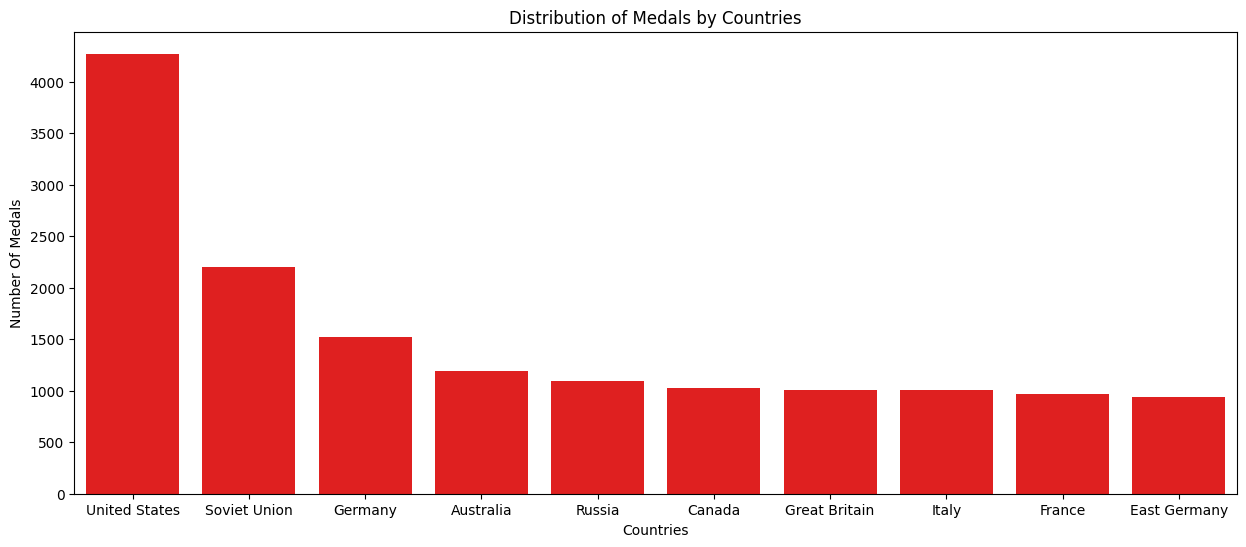

In [ ]:
plt.figure(figsize = (15,6))
sns.barplot(x= 'Team',y = "Medal",data = dis_cy,color= "Red")
plt.title("Distribution of Medals by Countries")
plt.xlabel("Countries")
plt.ylabel("Number Of Medals")
plt.show()

# **Visualizing Athlete Participation Across Different Sports?**
* "The barplot illustrates the number of athletes participating in each sport, highlighting the sports with the highest and lowest levels of athlete involvement.
* **athletics** most playing Gaming In Olympics,**Rowing**, **Swimming** 2nd,3rd *

In [ ]:
df_ath = df_athlete.groupby('Sport')['Name'].nunique().sort_values(ascending=False).reset_index(name = 'Number of Atheletes').head(10)

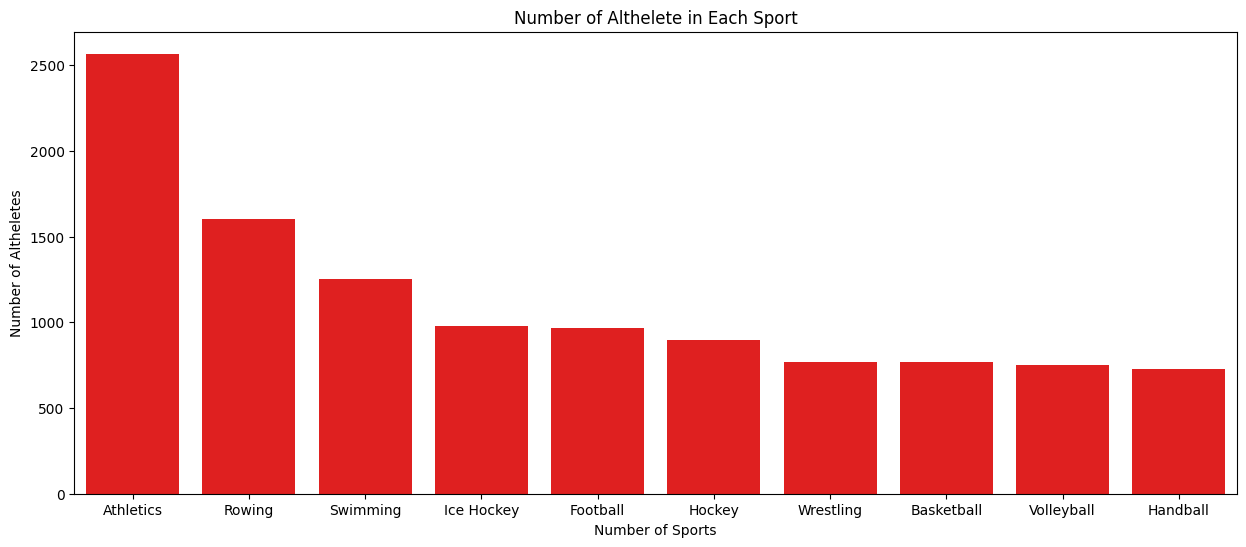

In [ ]:
plt.figure(figsize = (15,6))
sns.barplot(x= "Sport",y = 'Number of Atheletes',data = df_ath,color= 'Red')
plt.title("Number of Althelete in Each Sport")
plt.xlabel("Number of Sports")
plt.ylabel("Number of Altheletes")
plt.show()

# **Visualizing the Top Countries with the Most Gold Medals ?**
* **US have dominated in achieving top podium finishes,Soviet union and Germany 2dn, 3rd**

In [ ]:
df_gold = df_athlete[df_athlete["Medal"]=='Gold']

df_gold = df_gold.groupby('Team')["Medal"].count().sort_values(ascending=False).reset_index(name = 'Number of Gold Medals').head(10)

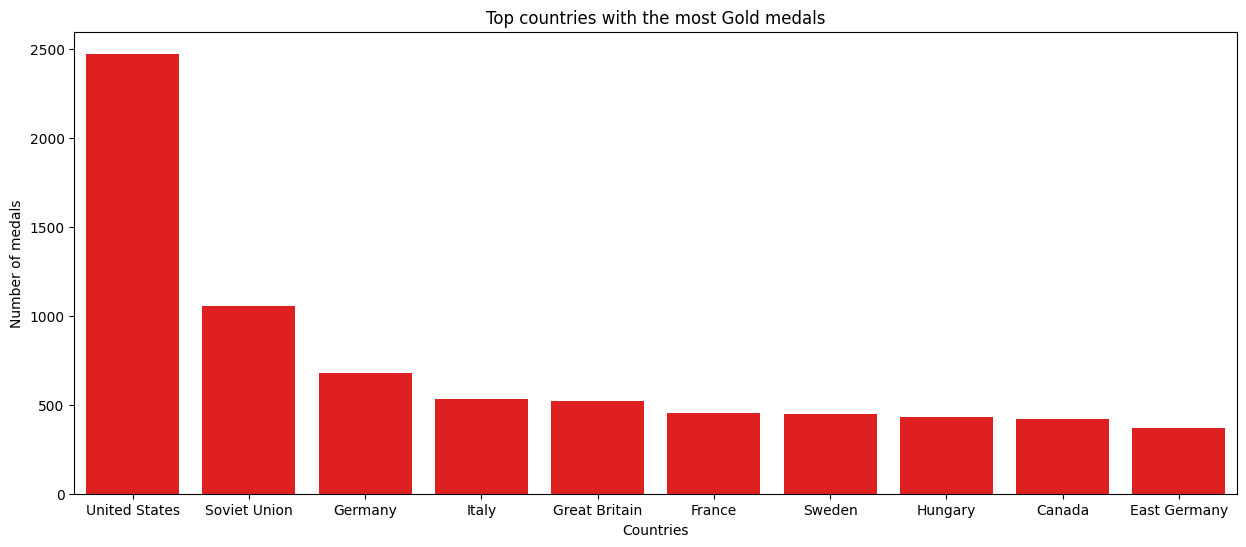

In [ ]:
plt.figure(figsize = (15,6))
sns.barplot(x= "Team",y = "Number of Gold Medals",data =df_gold,color = 'Red' )
plt.title("Top countries with the most Gold medals")
plt.xlabel("Countries")
plt.ylabel("Number of medals")
plt.show()

# **Convert the 'Year' column to a datetime object for accurate analysis of athlete data over time.**

In [ ]:
df_athlete["Year"]= pd.to_datetime(df_athlete['Year'],format = "%Y").dt.year
df_athlete

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271078,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver
271080,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze
271082,135554,Bogusaw Zych,M,28.0,182.0,82.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",Bronze
271102,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,64.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze


# **Trends in Medal Counts Over the Years**
* **After 1940 Number Of Medals Repidaly increase,sunddenly Down Falls in 1999 Around**
* The line plot reveals the fluctuations in the number of medals awarded over time, indicating significant peaks and troughs in various periods.

In [ ]:
df_year = df_athlete.Year.value_counts().reset_index()
df_year.sort_values(by = 'Year').head(1)

,Year,count
34,1896,20


Text(0, 0.5, 'Medals counts')

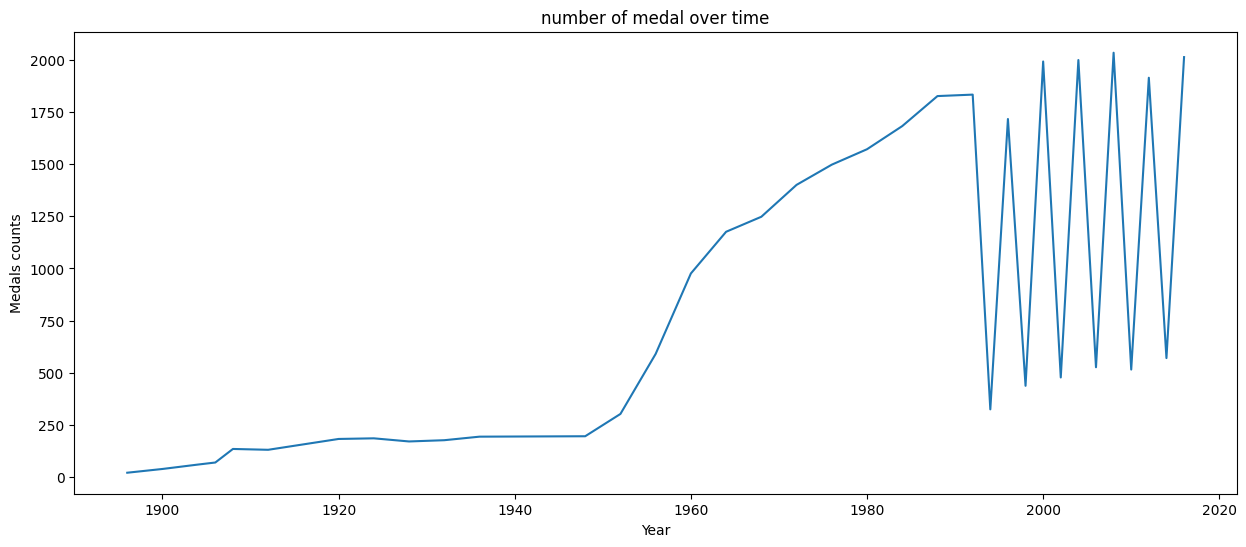

In [ ]:
plt.figure(figsize= (15,6))
sns.lineplot(x= 'Year',y= 'count',data = df_year)
plt.title("number of medal over time")
plt.xlabel("Year")
plt.ylabel("Medals counts")